C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


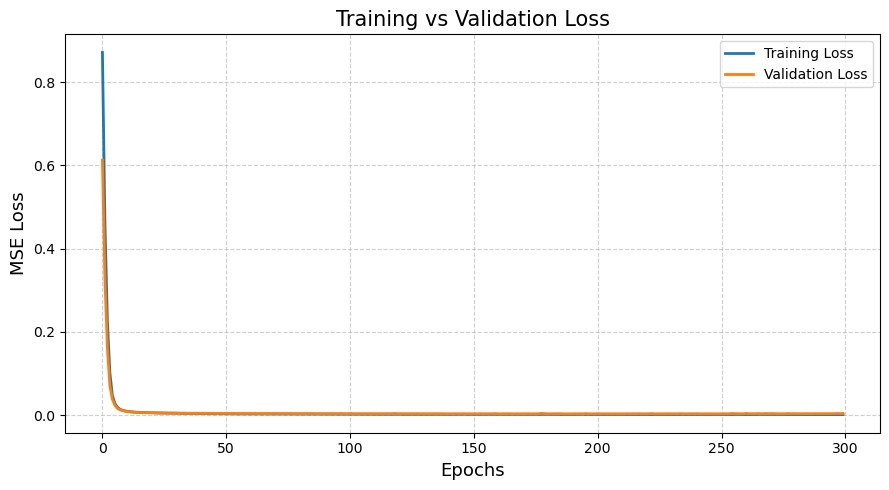

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


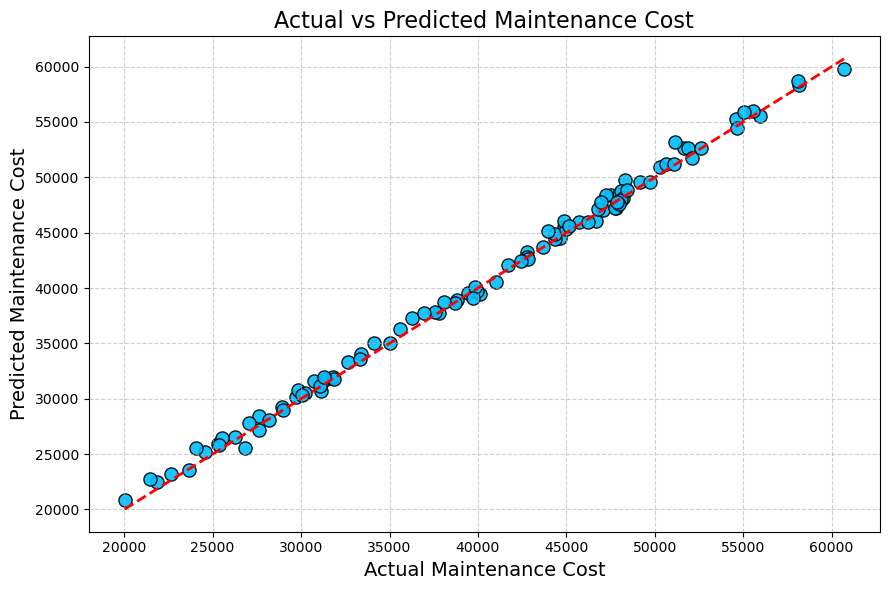

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Maintenance Cost: ₹41,015.45


In [18]:
# ==========================================================
# MACHINE MAINTENANCE COST PREDICTION (CORRECT VERSION)
# ==========================================================

# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ----------------------------------------------------------
# 2. Generate Synthetic Data
# ----------------------------------------------------------
np.random.seed(42)
m = 500   # Use enough samples for clean graphs

age = np.random.randint(1, 15, m)
hours = np.random.randint(100, 300, m)
vibration = np.random.uniform(0.5, 5.0, m)
temperature = np.random.uniform(60, 90, m)

cost = (
    2000 * age +
    50 * hours +
    3000 * vibration +
    100 * temperature +
    np.random.normal(0, 500, m)
)

df = pd.DataFrame({
    "age": age,
    "hours": hours,
    "vibration": vibration,
    "temperature": temperature,
    "cost": cost
})

# ----------------------------------------------------------
# 3. Split Features & Target
# ----------------------------------------------------------
X = df[["age", "hours", "vibration", "temperature"]].values
y = df["cost"].values.reshape(-1, 1)

# ----------------------------------------------------------
# 4. Scale Features AND Target (CRITICAL FIX)
# ----------------------------------------------------------
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ----------------------------------------------------------
# 5. Build Neural Network (ReLU Regression)
# ----------------------------------------------------------
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

# ----------------------------------------------------------
# 6. Train Model
# ----------------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    verbose=0
)

# ----------------------------------------------------------
# 7. Graph 1: Training vs Validation Loss
# ----------------------------------------------------------
plt.figure(figsize=(9,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("MSE Loss", fontsize=13)
plt.title("Training vs Validation Loss", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 8. Predictions (Inverse Transform)
# ----------------------------------------------------------
y_pred_scaled = model.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test)

# ----------------------------------------------------------
# 9. Graph 2: Actual vs Predicted (CORRECTLY ALIGNED)
# ----------------------------------------------------------
plt.figure(figsize=(9,6))
plt.scatter(
    y_actual,
    y_pred,
    color='deepskyblue',
    edgecolor='black',
    s=90,
    alpha=0.9
)

# Perfect prediction line (y = x)
min_val = min(y_actual.min(), y_pred.min())
max_val = max(y_actual.max(), y_pred.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',
    linewidth=2
)

plt.xlabel("Actual Maintenance Cost", fontsize=14)
plt.ylabel("Predicted Maintenance Cost", fontsize=14)
plt.title("Actual vs Predicted Maintenance Cost", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 10. Single Sample Prediction
# ----------------------------------------------------------
sample = np.array([[6, 220, 3.5, 75]])
sample_scaled = X_scaler.transform(sample)
sample_pred_scaled = model.predict(sample_scaled)
sample_pred = y_scaler.inverse_transform(sample_pred_scaled)

print(f"Predicted Maintenance Cost: ₹{sample_pred[0][0]:,.2f}")
